<a href="https://colab.research.google.com/github/yichikaw-collab/PythonTest/blob/main/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

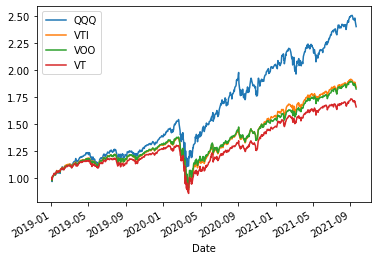

In [4]:
import sys
sys.path.append('/content/drive/MyDrive/module')
import datetime as datetime
import matplotlib.pyplot as plt
import pandas as pd
import yahoo_fin.stock_info as si

start=datetime.datetime(2019,1,1)
tickers = ['VTI','VOO','VT','QQQ']
df = pd.DataFrame()
for i in range(0,len(tickers),1):
 data = si.get_data(tickers[i], start_date=start)['adjclose']
 df=pd.concat([df, data], axis=1)
 df.rename(columns={'adjclose': tickers[i]}, inplace=True)
df = df/df.iloc[0]
df["Date"] = df.index
df.set_index(["Date"],inplace=True)
df = df.sort_values(df.index[-1],axis=1,ascending=False)
df.plot()
plt.show()

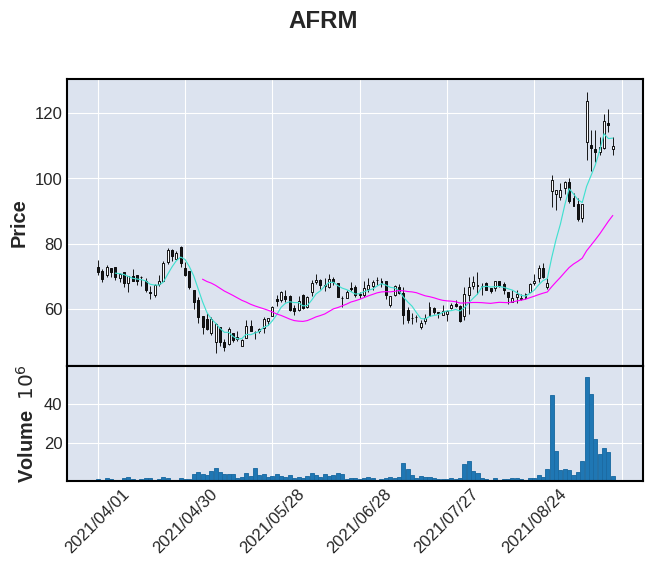

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/module')
import datetime as datetime
import yahoo_fin.stock_info as si
import mplfinance as mpf

ticker='AFRM'
data=si.get_data(ticker,start_date=datetime.datetime(2021,4,1))
mpf.plot(data,title=ticker,volume=True,type='candle',mav=(5,25)
,datetime_format='%Y/%m/%d')

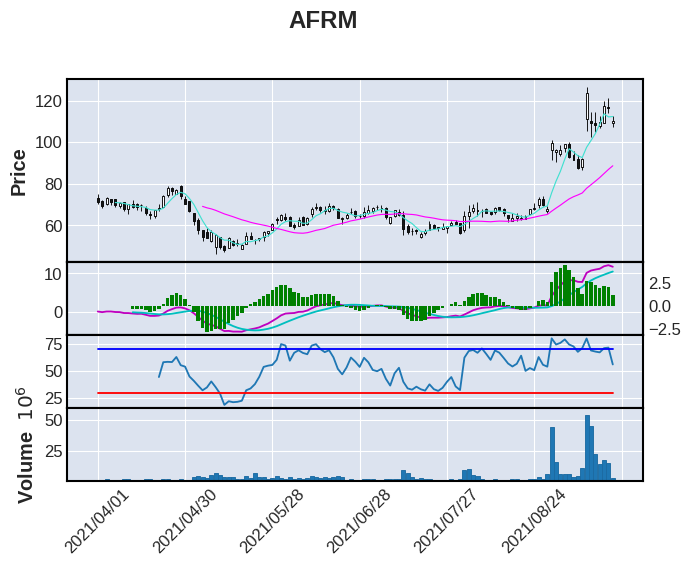

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/module')
import yahoo_fin.stock_info as si
import datetime as datetime
import mplfinance as mpf

ticker='AFRM'
data=si.get_data(ticker,start_date=datetime.datetime(2021,4,1))

# MACD
exp12 = data['adjclose'].ewm(span=12, adjust=False).mean()
exp26 = data['adjclose'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp12 - exp26
# Signal
data['Signal'] = data['MACD'].rolling(window=9).mean()
# Histgram
data['Hist'] = data['MACD'] - data['Signal']
 #RSI 
df_diff = data['adjclose'].diff()
df_up, df_down = df_diff.copy(), df_diff.copy()
df_up[df_up < 0] = 0
df_down[df_down > 0] = 0
df_down = df_down * -1
sim14_up = df_up.rolling(window=14).mean()
sim14_down = df_down.rolling(window=14).mean()
data['RSI'] = sim14_up / (sim14_up + sim14_down) * 100
data['RSI_hl'] = 70
data['RSI_ll'] = 30

add_plot=[
mpf.make_addplot(data['MACD'], color='m', panel=1, secondary_y=False),
mpf.make_addplot(data['Signal'], color='c', panel=1, secondary_y=False),
mpf.make_addplot(data['Hist'], type='bar', color='g', panel=1, secondary_y=True),
mpf.make_addplot(data['RSI'], panel=2),
mpf.make_addplot(data['RSI_hl'], color='b', panel=2, secondary_y=False),
mpf.make_addplot(data['RSI_ll'], color='r', panel=2, secondary_y=False)
]

mpf.plot(data,title=ticker,volume=True,volume_panel=3,datetime_format='%Y/%m/%d'
,type='candle',addplot=add_plot,mav=(5,25))

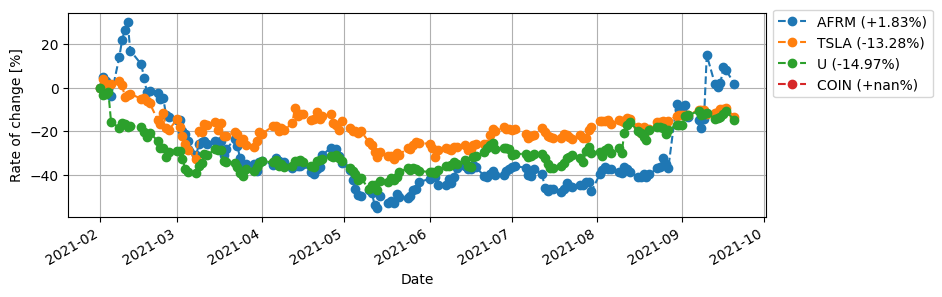

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/module')
import datetime as datetime
import matplotlib.pyplot as plt
import pandas as pd
import yahoo_fin.stock_info as si
import numpy as np

tickers = ['AFRM','U','TSLA','COIN']
start=datetime.datetime(2021,2,1)
stop=datetime.datetime(2021,10,1)
df = pd.DataFrame()
for i in range(len(tickers)):
 data = si.get_data(tickers[i], start_date=start, end_date=stop)['adjclose']
 df=pd.concat([df, data], axis=1)
 df.rename(columns={'adjclose': tickers[i]}, inplace=True)

plt.style.use('default')
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
df=(df/df.iloc[0]-1)*100
df.sort_values(df.index[-1],axis=1,ascending=False,inplace=True)
# ラベルに上昇率を追加
for i in range(len(df.columns)):
 per='%.2f'%((df[df.columns[i]].iloc[-1]))+"%"
 per='+'+per if (per[:1]!='-') else per
 df.rename(columns={df.columns[i]: df.columns[i]+' ('+per+')'}, inplace=True)

df.plot(ax=ax,grid=True,figsize=(9,3),style='o--').legend(bbox_to_anchor=(1, 1.05))#, prop=font)
ax.set_xlabel('Date')
ax.set_ylabel('Rate of change [%]')
plt.show()

In [ ]:
tickers = ['MSFT','AAPL','FB','GOOGL','AMZN','TSLA','NFLX','NVDA','TWTR','BABA','BIDU']
start=datetime.datetime(2021,6,1)
stop=datetime.datetime(2021,7,1)
df = pd.DataFrame()
for i in range(len(tickers)):
  data = si.get_data(tickers[i], start_date=start, end_date=stop)['adjclose']
  df=pd.concat([df, data], axis=1)
  df.rename(columns={'adjclose': tickers[i]}, inplace=True)

print(df)

                           MSFT        AAPL  ...        BABA        BIDU
2021-06-01 00:00:00  246.927277  124.094070  ...  219.479996  201.820007
2021-06-02 00:00:00  246.827469  124.872902  ...  219.589996  197.850006
2021-06-03 00:00:00  245.240524  123.355186  ...  217.039993  189.970001
2021-06-04 00:00:00  250.310791  125.701668  ...  219.020004  192.990005
2021-06-07 00:00:00  253.325027  125.711655  ...  216.899994  188.919998
2021-06-08 00:00:00  252.087418  126.550392  ...  215.820007  188.580002
2021-06-09 00:00:00  253.105453  126.939812  ...  213.320007  186.729996
2021-06-10 00:00:00  256.748474  125.921341  ...  213.070007  190.210007
2021-06-11 00:00:00  257.397247  127.159477  ...  211.639999  187.690002
2021-06-14 00:00:00  259.393433  130.284790  ...  213.940002  189.830002
2021-06-15 00:00:00  257.866333  129.446060  ...  210.059998  186.300003
2021-06-16 00:00:00  256.888214  129.955292  ...  209.320007  184.610001
2021-06-17 00:00:00  260.401489  131.592834  ...  2

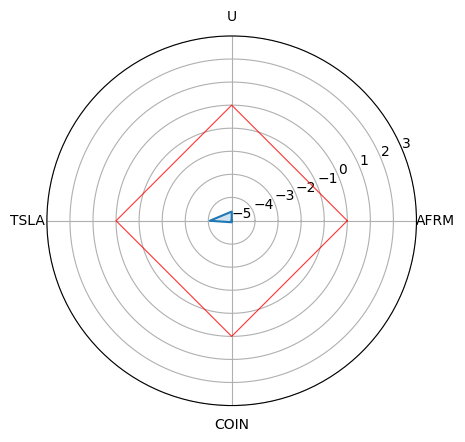

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/module')
import datetime as datetime
import matplotlib.pyplot as plt
import pandas as pd
import yahoo_fin.stock_info as si
import numpy as np

tickers = ['AFRM','U','TSLA','COIN']
df = pd.DataFrame()
for i in range(0,len(tickers),1):
 data = si.get_data(tickers[i])['adjclose']
 df=pd.concat([df, data], axis=1)
 df.rename(columns={'adjclose': tickers[i]}, inplace=True)

values = np.array(df.pct_change().iloc[-1]*100)
# 上限、下限リミットの設定　デフォルトは+3%から-3%
lim_max = 0
lim_min = 0
lim_max = values.max() if lim_max < values.max() else +3
lim_min = values.min() if lim_min > values.min() else -3

radar_values = np.concatenate([values, [values[0]]]) # 多角形を閉じる
angles = np.linspace(0, 2 * np.pi, len(tickers) + 1, endpoint=True) # プロット角度を生成
fig = plt.figure(facecolor="w")
ax = fig.add_subplot(1, 1, 1, polar=True)
ax.plot(angles, [0] * len(radar_values), color='red', alpha=0.8, linewidth=0.8) # 0を引く
ax.plot(angles, radar_values) # 線を引く
ax.fill(angles, radar_values, alpha=0.2) # 内側を塗る
ax.set_thetagrids(angles[:-1] * 180 / np.pi, tickers) # ラベル表示
plt.ylim(lim_min,lim_max) # 上限下限リミット
plt.show()

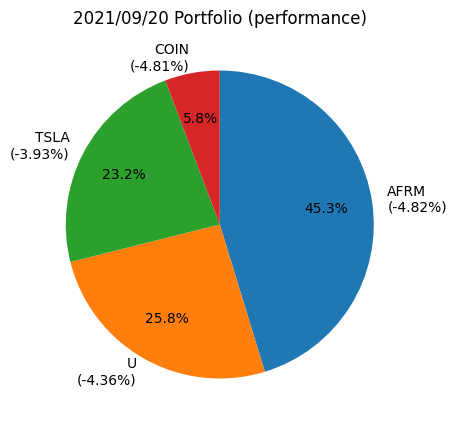

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/module')
import numpy as np
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si

mypf = {'AFRM':116, 'U':56, 'TSLA':9, 'COIN':7}

label=[]
stock_today=[]
stock_percent=[]

for ticker in mypf.keys():
 try:
  data = si.get_data(ticker)["adjclose"]
 except:
  print("ERROR:",ticker)
  pass
 stock_today.append(data.iat[-1]*mypf[ticker])
 stock_percent.append((data.iat[-1]*mypf[ticker]-data.iat[-2]*mypf[ticker])/(data.iat[-2]*mypf[ticker])*100)
 label.append(ticker+'\n('+'{:.2%}'.format(stock_percent[-1]/100)+')')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title(data.index[-1].strftime('%Y/%m/%d')+' Portfolio (performance)')
plt.pie(stock_today, labels=label, counterclock=False, startangle=90, autopct="%.1f%%", pctdistance=0.7)
plt.show()